# Performing Statistical Analysis and Visualizations on StockX Data 2019

This dataset was obtained from Kaggle.com (https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest)

-------------------------------------------------------------------------------------------------------------
Import the pandas package into the notebook. From here you will be able to read the StockX dataset and load it into the pandas dataframe.

In [2]:
import pandas as pd
data = pd.read_csv("StockXDataContest2019-3.csv")

In [3]:
data.head(6)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
5,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan


# Pre-processing the Data

Check for missing values. This is an important step before cleaning the data because missing values can alter findings of the data. The values can be removed or the mean (average) can be used.

In [4]:
data.isnull()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
99951,False,False,False,False,False,False,False,False
99952,False,False,False,False,False,False,False,False
99953,False,False,False,False,False,False,False,False
99954,False,False,False,False,False,False,False,False


-------------------------------------------------------------------------------------------------------------
No values were missing, so, the data can actually be pre-processed now. Taking a look at the heading above, it is seen that there are commas and dollar signs which will affect the statistical analysis. These can be removed:

In [5]:
colstocheck = data.columns
data[colstocheck] = data[colstocheck].replace({'\$': '', ',': ''}, regex = True)
print(data)

      Order Date   Brand                                   Sneaker Name  \
0         9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1         9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2         9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3         9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4         9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
...          ...     ...                                            ...   
99951    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

      Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0           1097          220

-------------------------------------------------------------------------------------------------------------
It's a good idea to change the column names using snake_case, which is a naming convention used to to replace spaces between words with underscores. The purpose of this is to reduce time errors; most programming languages do not allow variables to contain spaces (https://www.theserverside.com/definition/Snake-case).

In [7]:
data.set_axis(['order_date', 'brand', 'sneaker_name','sale_price','retail_price','release_date','size','state'], axis='columns', inplace=True)
data

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,size,state
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,12/26/18,11.0,California


-------------------------------------------------------------------------------------------------------------
The last step in the pre-processing phase is to check the data types of the dataset. This is useful for the actual statistical analysis that will be performed.

In [8]:
data.dtypes

order_date       object
brand            object
sneaker_name     object
sale_price       object
retail_price     object
release_date     object
size            float64
state            object
dtype: object

To perform some summary statistics, it is necessary for the 'sale_price', 'retail_price' and 'size' columns to be coverted into float data types to use them as numeric values.

In [9]:
data['sale_price']= data['sale_price'].astype(float)
data['retail_price']= data['retail_price'].astype(float)
data['size']=data['size'].astype(float)

-------------------------------------------------------------------------------------------------------------
Now that pre-processing is complete, we can start performing some statistical analysis. First, you can find the highest and lowest sale prices per sneaker model.

In [10]:
data.groupby('sneaker_name')['sale_price'].max()

sneaker_name
Adidas-Yeezy-Boost-350-Low-Moonrock                  2000.0
Adidas-Yeezy-Boost-350-Low-Oxford-Tan                1470.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015         1300.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016         1455.0
Adidas-Yeezy-Boost-350-Low-Turtledove                2300.0
Adidas-Yeezy-Boost-350-Low-V2-Beluga                 1490.0
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                 840.0
Adidas-Yeezy-Boost-350-V2-Blue-Tint                  2000.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper          1095.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Green            999.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Red             1575.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017        1515.0
Adidas-Yeezy-Boost-350-V2-Core-Black-White           1100.0
Adidas-Yeezy-Boost-350-V2-Cream-White                 773.0
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow         1825.0
Adidas-Yeezy-Boost-350-V2-Sesame                      545.0
Adidas-Yeezy-Boost-350-V2-Z

In [11]:
data.groupby('sneaker_name')['sale_price'].min()

sneaker_name
Adidas-Yeezy-Boost-350-Low-Moonrock                   730.0
Adidas-Yeezy-Boost-350-Low-Oxford-Tan                 741.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015          721.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016          675.0
Adidas-Yeezy-Boost-350-Low-Turtledove                1042.0
Adidas-Yeezy-Boost-350-Low-V2-Beluga                  528.0
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                 200.0
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   286.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper           500.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Green            450.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Red              650.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         636.0
Adidas-Yeezy-Boost-350-V2-Core-Black-White            570.0
Adidas-Yeezy-Boost-350-V2-Cream-White                 200.0
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          210.0
Adidas-Yeezy-Boost-350-V2-Sesame                      186.0
Adidas-Yeezy-Boost-350-V2-Z

-------------------------------------------------------------------------------------------------------------
Find the highest and lowest sales per sneaker brand.

In [12]:
data.groupby('brand')['sale_price'].max()

brand
 Yeezy       2300.0
Off-White    4050.0
Name: sale_price, dtype: float64

In [13]:
data.groupby('brand')['sale_price'].min()

brand
 Yeezy       186.0
Off-White    203.0
Name: sale_price, dtype: float64

-------------------------------------------------------------------------------------------------------------
Now, find the average cost of the resale price per sneaker model.

In [14]:
data.groupby('sneaker_name')['sale_price'].mean()

sneaker_name
Adidas-Yeezy-Boost-350-Low-Moonrock                   996.710000
Adidas-Yeezy-Boost-350-Low-Oxford-Tan                1011.514286
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015          895.094737
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016          984.237705
Adidas-Yeezy-Boost-350-Low-Turtledove                1531.661765
Adidas-Yeezy-Boost-350-Low-V2-Beluga                  788.704819
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                 400.439634
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   378.986125
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper           656.631111
Adidas-Yeezy-Boost-350-V2-Core-Black-Green            622.801020
Adidas-Yeezy-Boost-350-V2-Core-Black-Red              937.754967
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         804.304438
Adidas-Yeezy-Boost-350-V2-Core-Black-White            718.412238
Adidas-Yeezy-Boost-350-V2-Cream-White                 288.708805
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          390.586939
Adidas-Yeezy

-------------------------------------------------------------------------------------------------------------
Lastly, we can find the typical size purchased, and check for the most common bought sneaker model in each state, respectively.

In [15]:
data['size'].value_counts()

10.0    11093
9.0      9706
11.0     9251
10.5     8784
9.5      8685
12.0     7297
8.0      5363
8.5      5300
13.0     4602
11.5     4502
6.0      4013
7.0      3867
5.0      3577
7.5      2664
5.5      2621
4.0      2241
6.5      2219
14.0     1791
4.5      1304
12.5      628
13.5      147
15.0      130
14.5       84
16.0       79
17.0        4
3.5         4
Name: size, dtype: int64

In [18]:
data.groupby('state')['sneaker_name'].max()

state
Alabama                 adidas-Yeezy-Boost-350-V2-Static-Reflective
Alaska                             adidas-Yeezy-Boost-350-V2-Static
Arizona                 adidas-Yeezy-Boost-350-V2-Static-Reflective
Arkansas                adidas-Yeezy-Boost-350-V2-Static-Reflective
California              adidas-Yeezy-Boost-350-V2-Static-Reflective
Colorado                adidas-Yeezy-Boost-350-V2-Static-Reflective
Connecticut             adidas-Yeezy-Boost-350-V2-Static-Reflective
Delaware                adidas-Yeezy-Boost-350-V2-Static-Reflective
District of Columbia    adidas-Yeezy-Boost-350-V2-Static-Reflective
Florida                 adidas-Yeezy-Boost-350-V2-Static-Reflective
Georgia                 adidas-Yeezy-Boost-350-V2-Static-Reflective
Hawaii                  adidas-Yeezy-Boost-350-V2-Static-Reflective
Idaho                   adidas-Yeezy-Boost-350-V2-Static-Reflective
Illinois                adidas-Yeezy-Boost-350-V2-Static-Reflective
Indiana                 adidas-Yeezy-Boost

# Visualizing the Dataset

To visualize the data, we can utilize the seaborn package, which is data visualization library based from the matplotlib library.

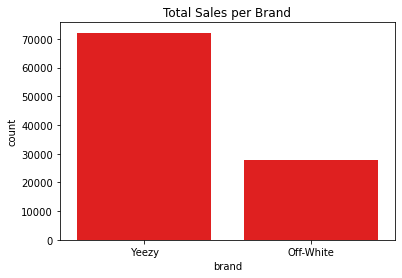

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x="brand",
    data=data,
    color="red")
plt.title("Total Sales per Brand")
plt.show()

-------------------------------------------------------------------------------------------------------------
Below, we can visualize sneaker sales by state, size and sneaker model.

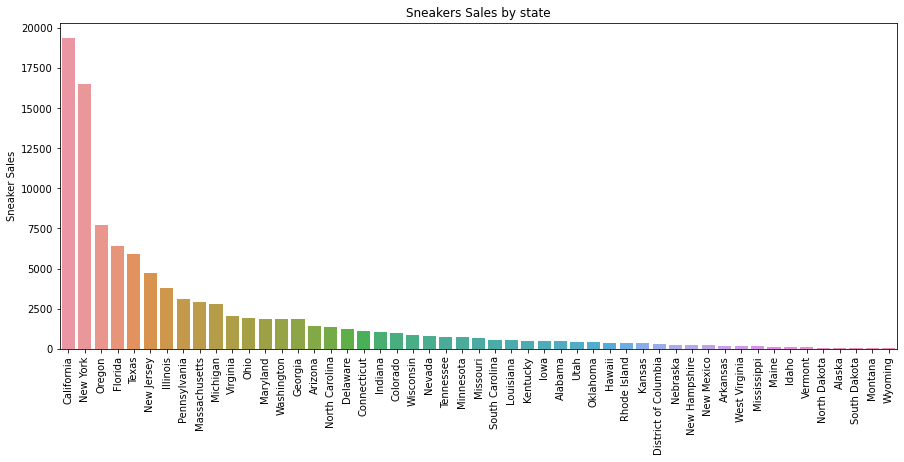

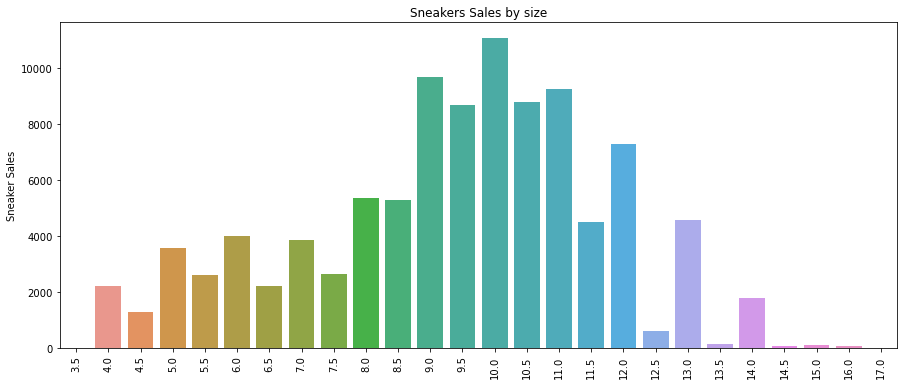

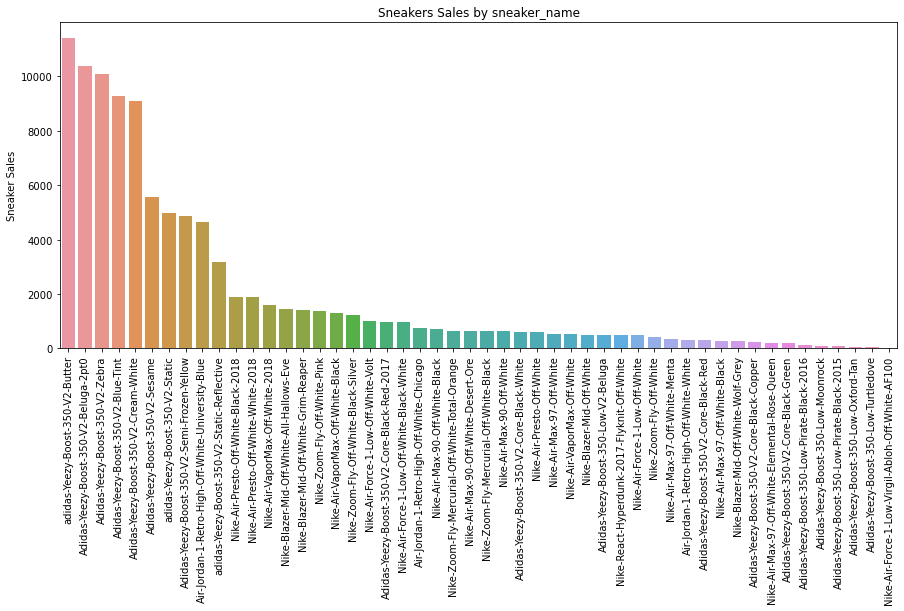

In [20]:
data_cat = ['state','size','sneaker_name']
for cat in data_cat:
    cat_num = data[str(cat)].value_counts()
    plt.figure(figsize=(15,6))
    chart = sns.barplot(x = cat_num.index, y= cat_num)
    chart.set_title("Sneakers Sales by %s" % (cat))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show(15)